# Imports and generating data

In [6]:
import random
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm
from sklearn.decomposition import PCA
%matplotlib notebook

random.seed(420)
def generate_data(n):
    X, Y, Z = [], [], []
    for i in range(n):
        x = int(round(random.uniform(0, 1)))
        y = int(round(random.uniform(0, 1)))
        X.append(x)
        Y.append(y)
    for x in X:
        if x == 1:
            if random.uniform(0, 1) < 0.9:
                z = 1
            else:
                z = 0
        else:
            if random.uniform(0, 1) < 0.5:
                z = 1
            else:
                z = 0
        Z.append(z)
    df = pd.DataFrame(
    {"x": X,
     "y": Y,
     "z": Z
    })

    return(df)

survey_data = generate_data(2000)
named_survey_data = survey_data.rename(columns={'x': 'Fizzy', 'y': 'Sweet', 'z': 'Sparkling'})

In [7]:
named_survey_data.head(10)

,Fizzy,Sweet,Sparkling
0,0,1,0
1,0,0,1
2,1,1,1
3,0,0,0
4,1,0,1
5,1,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,0,0,0


In [8]:
named_survey_data.corr()

,Fizzy,Sweet,Sparkling
Fizzy,1.000000,0.003993,0.396437
Sweet,0.003993,1.000000,0.008402
Sparkling,0.396437,0.008402,1.000000


# Plotting data

<IPython.core.display.Javascript object>


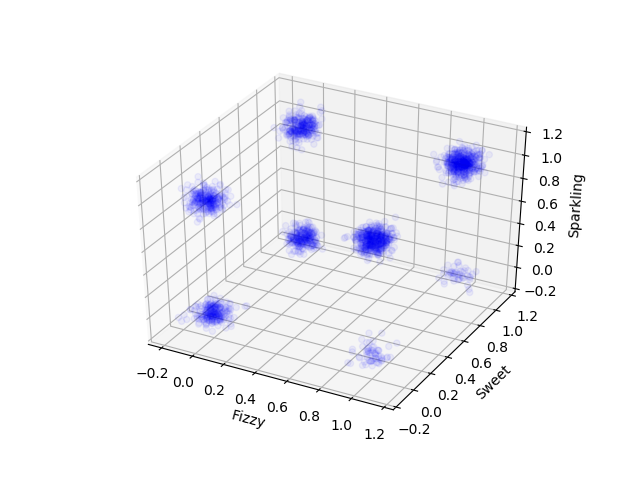

In [9]:
# generate zero-centred Gaussian noise and add to original survey data
noise = np.random.normal(0, 0.05, survey_data.shape)
noisy_survey_data = survey_data + noise

# create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(noisy_survey_data["x"], noisy_survey_data["y"], noisy_survey_data["z"],
           c = 'blue',
           marker = 'o',
           alpha = 0.05)

ax.set_xlabel('Fizzy')
ax.set_ylabel('Sweet')
ax.set_zlabel('Sparkling')
plt.show()

# Display principle components

In [10]:
pca = PCA(n_components = 3)
pca.fit(survey_data)

print(pca.components_)
print(pca.explained_variance_)

[[-0.79211006 -0.02828888 -0.60972239]
 [-0.02709955  0.99957033 -0.01117048]
 [ 0.60977641  0.00767495 -0.79253633]]
[0.31887388 0.25007659 0.1340823 ]


<IPython.core.display.Javascript object>


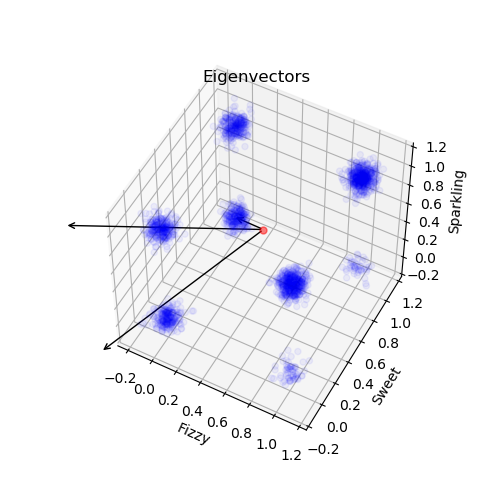

In [11]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(noisy_survey_data["x"], noisy_survey_data["y"], noisy_survey_data["z"],
           c = 'blue',
           marker = 'o',
           alpha = 0.05)
ax.plot([np.mean(survey_data["x"])], [np.mean(survey_data["y"])], [np.mean(survey_data["z"])], 
        marker = 'o', 
        markersize = 5, 
        color = 'red', 
        alpha=0.5)
for v in pca.components_.T:
    a = Arrow3D([np.mean(survey_data["x"]), v[0]], [np.mean(survey_data["y"]), v[1]], [np.mean(survey_data["z"]), v[2]], 
                mutation_scale=10, 
                lw = 1, 
                arrowstyle = "->", 
                color = "black")
    ax.add_artist(a)
ax.set_xlabel('Fizzy')
ax.set_ylabel('Sweet')
ax.set_zlabel('Sparkling')

plt.title('Eigenvectors')

plt.show()

# Regression plane

<IPython.core.display.Javascript object>


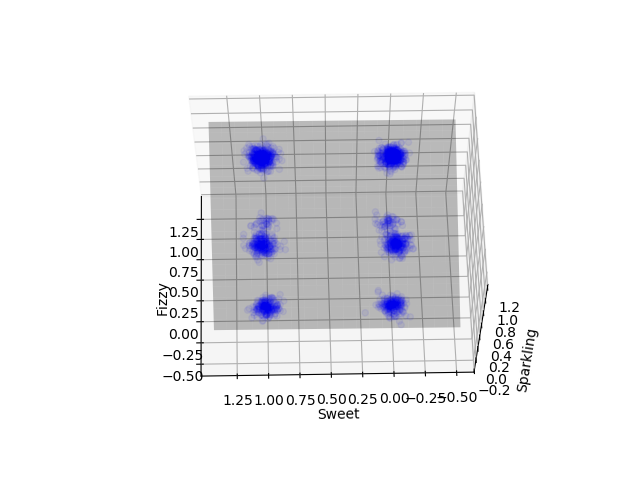

In [12]:
model = sm.ols(formula = 'z ~ x + y', data = survey_data)
fit = model.fit()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-0.5, 1.5, 0.1)                # generate a mesh
y_surf = np.arange(-0.5, 1.5, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'x': x_surf.ravel(), 'y': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride = 1,
                cstride = 1,
                color = 'None',
                alpha = 0.25)

ax.scatter(noisy_survey_data["x"], noisy_survey_data["y"], noisy_survey_data["z"],
           c = 'blue',
           marker = 'o',
           alpha = 0.05)

ax.set_xlabel('Fizzy')
ax.set_ylabel('Sweet')
ax.set_zlabel('Sparkling')

plt.show()

# Dimension reduction

In [13]:
pca = PCA(2)  # project from 3 to 2 dimensions
projected_survey_data = pca.fit_transform(survey_data)
print(survey_data.shape)
print(projected_survey_data.shape)

(2000, 3)
(2000, 2)


# Project to 2D

<IPython.core.display.Javascript object>


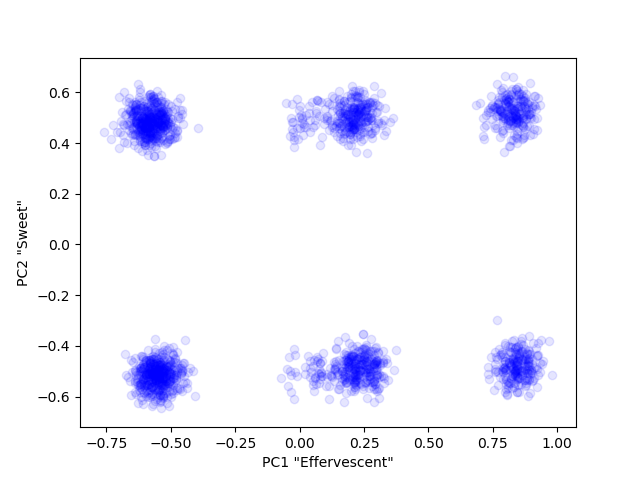

In [14]:
# generate zero-centred Gaussian noise and add to original survey data
noise = np.random.normal(0, 0.05, projected_survey_data.shape)
noisy_projected_survey_data = projected_survey_data + noise

# create plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(noisy_projected_survey_data[:, 0], noisy_projected_survey_data[:, 1],
           c = 'blue',
           marker = 'o',
           alpha = 0.1)

ax.set_xlabel('PC1 "Effervescent"')
ax.set_ylabel('PC2 "Sweet"')
plt.show()